In [333]:
import sympy as sp
import numpy as np
import scipy
import matplotlib.pyplot as plt


In [334]:
# Edge variables
e1, f1, e2, f2, e3, f3, e4, f4 = sp.symbols('e1, f1, e2, f2, e3, f3, e4, f4')

# Node variables
q2, p3 = sp.symbols('q2, p3')

# Node variable derivatives
q2_dot, p3_dot = sp.symbols('q2_dot, p3_dot')

# Input variables
u1 = sp.symbols('u1')

# Parameters
I3 = 20
C2 = 1/2
R4 = 4

sys_eq = [
sp.Eq(q2_dot, f2),
sp.Eq(p3_dot, e3),
sp.Eq(e3, e1 - e2 - e4),
sp.Eq(f1, f3),
sp.Eq(f2, f3),
sp.Eq(f4, f3),
# sp.Eq(sp.Derivative(p3, t), f3),
# sp.Eq(sp.Derivative(q2, t), f2),
sp.Eq(f3, p3/I3),
sp.Eq(e2, q2/C2),
sp.Eq(e4, f4*R4),
sp.Eq(e1, u1)]


# print("Sys Eq: ", sys_eq)
# print()

# subs_eq = [eq for eq in sys_eq if 'q2_dot' not in str(eq) and 'p3_dot' not in str(eq)]
# print("Subs Eq: ", subs_eq)
# print(type(subs_eq[1]))

# subs_eq = [(eq.lhs, eq.rhs) for eq in sys_eq if 'q2_dot' not in str(eq) and 'p3_dot' not in str(eq)]
# print("Subs Eq: ", subs_eq)



# # sp.solve(sys_eq, [q2_dot, p3_dot])


# sys_eq_subs = [eq.subs(subs_eq) for eq in sys_eq]
# # print(sys_eq_subs)

symbols = [eq.lhs for eq in sys_eq]
A, b = sp.linear_eq_to_matrix(sys_eq, *symbols)
print(A)
print(b)
    

Matrix([[1, 0, 0, 0, -1, 0, 0, 0, 0, 0], [0, 1, -1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, -1], [0, 0, 0, 1, 0, 0, -1, 0, 0, 0], [0, 0, 0, 0, 1, 0, -1, 0, 0, 0], [0, 0, 0, 0, 0, 1, -1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, -4, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
Matrix([[0], [0], [0], [0], [0], [0], [p3/20], [2.0*q2], [0], [u1]])


In [335]:

def msd_dynamics(t, x, u):
    t = sp.symbols('t')
    # Edge variables
    e1, f1, e2, f2, e3, f3, e4, f4 = sp.symbols('e1, f1, e2, f2, e3, f3, e4, f4')

    # Node variables
    q2, p3 = sp.symbols('q2, p3')

    # Node variable derivatives
    q2_dot, p3_dot = sp.symbols('q2_dot, p3_dot')

    # Input variables
    u1 = sp.symbols('u1')

    # Parameters
    # I3 = 1
    # C2 = 0.1
    # R4 = 2
    I3 = 20
    C2 = 1/2
    R4 = 4


    # Substitute in the actual value of the state variable
    q2 = x[0]
    p3 = x[1]
    
    # Substitute control input
    u1 = u
    
    # State space equations
    sys_eq = [
    sp.Eq(q2_dot, f2),
    sp.Eq(p3_dot, e3),
    sp.Eq(e3, e1 - e2 - e4),
    sp.Eq(f1, f3),
    sp.Eq(f2, f3),
    sp.Eq(f4, f3),
    # sp.Eq(sp.Derivative(p3, t), f3),
    # sp.Eq(sp.Derivative(q2, t), f2),
    sp.Eq(f3, p3/I3),
    sp.Eq(e2, q2/C2),
    sp.Eq(e4, f4*R4),
    sp.Eq(e1, u1)]


   
    # print(sys_eq)
    # print("System Equations: ", sys_eq)
    
    # symbols = [eq.lhs for eq in sys_eq]
    
    A, b = sp.linear_eq_to_matrix(sys_eq, q2_dot, p3_dot, e1, f1, e2, f2, e3, f3, e4, f4)
    # A, b = sp.linear_eq_to_matrix(sys_eq, *symbols)
    
    
    print("Matrix Formulation (Ax = b): ")
    print("============================")
    print(f"A {A.shape}: {A}")
    print(f"b {b.shape}: {b}")
    

    x = np.linalg.solve(np.array(A).astype('float'), np.array(b).astype('float'))
    x = x.flatten()
    

    

    # Return the solution
    return [x[0], x[1]]



In [336]:
msd_dynamics(0, [1, 5], 0)

Matrix Formulation (Ax = b): 
A (10, 10): Matrix([[1, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, -1, 0, 0, 0], [0, 0, -1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, -1, 0, 0], [0, 0, 0, 0, 0, 1, 0, -1, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, -4], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
b (10, 1): Matrix([[0], [0], [0], [0], [0], [0], [0.250000000000000], [2.00000000000000], [0], [0]])


[0.25, -3.0]

In [337]:

t_span = [0, 60]
t_eval = np.linspace(t_span[0], t_span[1], 1000)
x0 = [0.0, 0.0]

sol = scipy.integrate.solve_ivp(msd_dynamics, t_span, x0, args=(5,),method='RK45', t_eval=t_eval)
print(type(sol))



Matrix Formulation (Ax = b): 
A (10, 10): Matrix([[1, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, -1, 0, 0, 0], [0, 0, -1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, -1, 0, 0], [0, 0, 0, 0, 0, 1, 0, -1, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, -4], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
b (10, 1): Matrix([[0], [0], [0], [0], [0], [0], [0], [0], [0], [5]])
Matrix Formulation (Ax = b): 
A (10, 10): Matrix([[1, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, -1, 0, 0, 0], [0, 0, -1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, -1, 0, 0], [0, 0, 0, 0, 0, 1, 0, -1, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, -4], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])
b (10, 1): Matrix([[0], [0], [0], [0], [0], [0], [2.50000000000000e-7], [0], [0], [5]])
Matrix Formulation (Ax = b): 
A (10, 10): Matrix([[1, 0, 0, 0, 0, -1, 0, 0, 0, 0], [0,

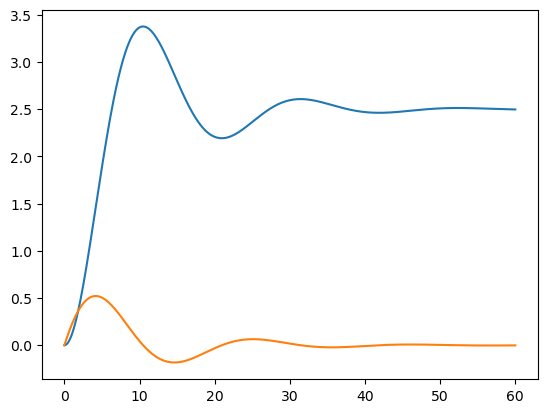

In [338]:
# print(sol.y[0])
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1]/20)

In [339]:
x, y, z= sp.symbols('x, y, z')
equation_one = sp.Eq(4*x + 3*y + 0.5*z, 1)
equation_two = sp.Eq(2*x + 1*y + 0.1*z, 2)

equations = [equation_one, equation_two]
# equations = [equation_two, equation_one]
# A, b = sp.linear_eq_to_matrix(equations, x, y)
A, b = sp.linear_eq_to_matrix(equations, y, x, z)
print(b)
A


Matrix([[1], [2]])


Matrix([
[3, 4, 0.5],
[1, 2, 0.1]])